In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
data = pd.read_csv("NYC_data.csv")

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


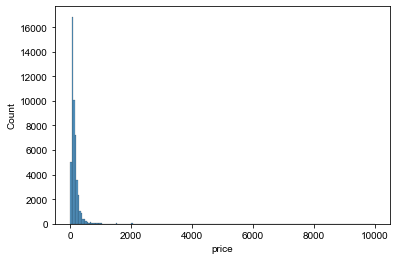

In [4]:
## Checking the tail of target variable "price"

sns.histplot(data['price'], bins=200)
sns.set(rc = {'figure.figsize':(15,15)})

In [5]:
base = ['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

In [6]:
Features = data[base]

In [7]:
Features.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


### Question 1

##### Find a feature with missing values. How many missing values does it have?

In [8]:
for f in Features:
    if Features[f].isna().sum() != 0:
        print(f, ":", Features[f].isna().sum())

reviews_per_month : 10052


### Question 2

##### What's the median (50% percentile) for variable 'minimum_nights'?

In [9]:
Features['minimum_nights'].median()

3.0

### Split the data

##### Shuffle the initial dataset, use seed 42.
##### Split your data in train/val/test sets, with 60%/20%/20% distribution.
##### Make sure that the target value ('price') is not in your dataframe.
##### Apply the log transformation to the price variable using the np.log1p() function.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


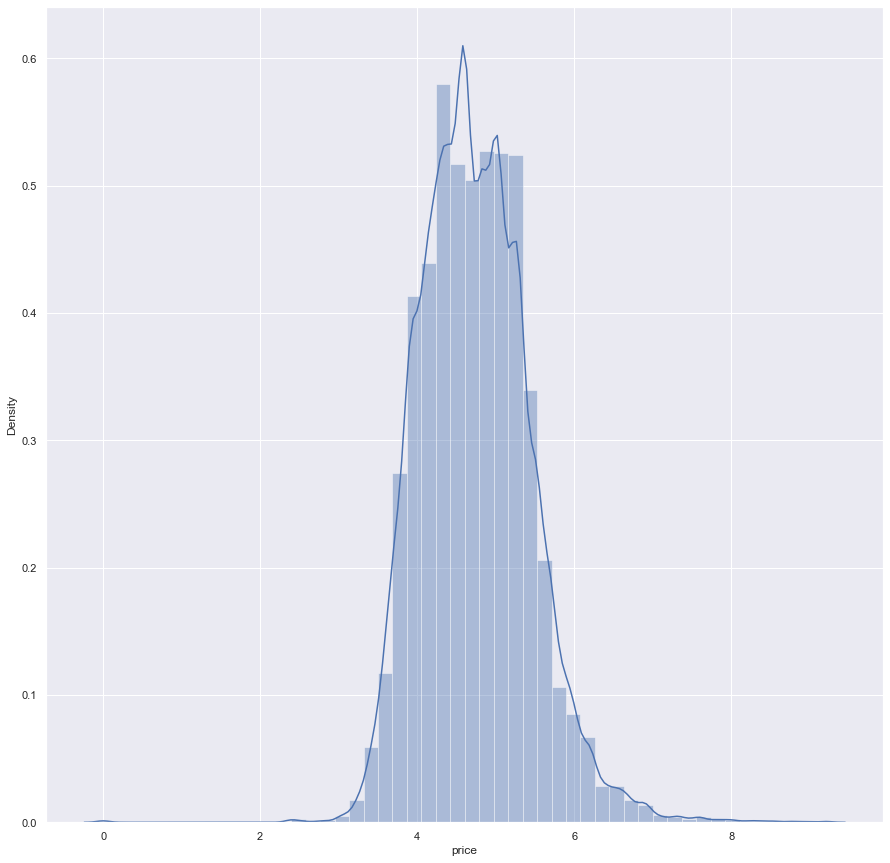

In [10]:
sns.distplot(np.log1p(data.price))

In [11]:
n = len(Features)

val_data = int(0.2 * n)
test_data = int(0.2 * n)
train_data = int(n - (val_data+test_data))

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

data_shuffled = Features.iloc[idx]

In [16]:
data_train = Features.iloc[:train_data]
data_val = Features.iloc[train_data:train_data+val_data]
data_test = Features.iloc[train_data+val_data:]

data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [17]:
y_train_orig = data_train.price.values
y_val_orig = data_val.price.values
y_test_orig = data_test.price.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

In [18]:
del data_train['price']
del data_val['price']
del data_test['price']

In [22]:
data_train.shape

(29337, 7)

In [23]:
data_val.shape

(9779, 7)

In [24]:
data_test.shape

(9779, 7)

### Question 3
##### We need to deal with missing values for the column from Q1.
##### We have two options: fill it with 0 or with the mean of this variable.
##### Try both options. For each, train a linear regression model without regularization using the code from the lessons.
##### For computing the mean, use the training only!
##### Use the validation dataset to evaluate the models and compare the RMSE of each option.
##### Round the RMSE scores to 2 decimal digits using round(score, 2)
##### Which option gives better RMSE?